# PRACTICA 9.1 - PERCEPTRÓN SIMPLE Y ADALINE

## Andrés Cabero Mata

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
#Clase del perceptron simple.
class simple_perceptron():
    
    def __init__(self, n_inputs = 2, n_outputs = 1, W = None, b = None):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.W = W
        self.b = b
        
        if self.W is None:
            self.W = np.random.rand(self.n_outputs, self.n_inputs) - 0.5
        if self.b is None:
            self.b = np.random.rand(self.n_outputs, 1) - 0.5
            
    def predict(self, x):
        return np.sign(self.W @ x.T + self.b).T.astype(int)
    
    def train(self, X, D):
        if np.sum(self.predict(X) == D) != D.shape[0]:
            cont = True
            p = 0
            
            while cont:
                v = p % X.shape[0]
                x = X[v].reshape(1, -1)
                y = self.predict(x)
                d = D[v].reshape(1, -1)

                if y != d:
                    self.W += d * x
                    self.b += d

                    if np.sum(self.predict(X) == D) == D.shape[0]:
                        cont = False
                p += 1
        return
    
    def get_params(self):
        return self.W, self.b

In [3]:
#Grupos con funciones separadas para facilitar la separación sin necesidad de reescalar
X1, y1 =  make_blobs(n_samples=1000, n_features=2, centers=1, random_state=1)
X2, y2 =  make_blobs(n_samples=1000, n_features=2, centers=1, random_state=6)

In [4]:
#Clases con valor 1 y -1 para los distintos grupos.
y1+=1
y2-=1

In [5]:
X1.shape, X2.shape, y1.shape, y2.shape, y1[0], y2[0]

((1000, 2), (1000, 2), (1000,), (1000,), 1, -1)

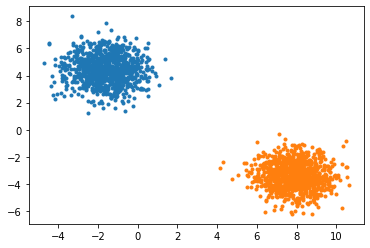

In [6]:
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.show()

In [7]:
#Datos y target unidos para ambos grupos
D = np.concatenate((X1, X2))
t = np.concatenate((y1, y2)).reshape(-1,1)

In [8]:
#Normalización de los datos
D = MinMaxScaler().fit_transform(D)

In [9]:
D.shape, t.shape, t[0], t[1000]

((2000, 2), (2000, 1), array([1]), array([-1]))

In [10]:
w = np.array([0.75, 1.]).reshape(1,2)
B = np.array([-3]).reshape(1,1)

In [11]:
sp = simple_perceptron(n_inputs=2, n_outputs=1, W=w, b=B)

In [12]:
sp.train(D, t)

In [13]:
p, b = sp.get_params() 

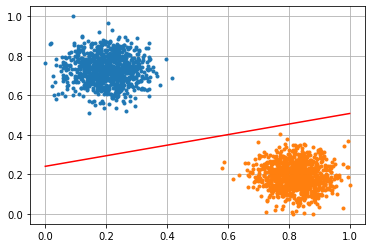

In [14]:
plt.plot(D[:1000,0], D[:1000,1], '.')
plt.plot(D[1000:,0], D[1000:,1], '.')

#Puntos de la recta generada por el perceptrón
r1 = np.array([0.0, 1.0])
r2 = np.array([-b[0,0]/p[0,1],(-b[0,0]-p[0,0])/p[0,1]])
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))
plt.grid()
plt.plot(r1, r2, c="red")
plt.show();